In [10]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree
from io import StringIO
import graphviz

In [29]:
epl = pd.read_csv('/Users/roshanjain/Downloads/Data Science/season-1819_csv.csv')

In [31]:
epl.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,FTR(Points),HTHG,HTAG,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/8/18,Man United,Leicester,2,1,H,3,1,0,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,3,1,0,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,0,1,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,0,2,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,0,1,2,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [32]:
epl.fillna(0,inplace=True)

In [33]:
epl_onehot = epl.copy()

In [34]:
epl.shape

(380, 63)

In [35]:
epl.isnull().sum()

Div            0
Date           0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
FTR(Points)    0
HTHG           0
HTAG           0
HTR            0
Referee        0
HS             0
AS             0
HST            0
AST            0
HF             0
AF             0
HC             0
AC             0
HY             0
AY             0
HR             0
AR             0
B365H          0
B365D          0
B365A          0
BWH            0
BWD            0
BWA            0
              ..
PSH            0
PSD            0
PSA            0
WHH            0
WHD            0
WHA            0
VCH            0
VCD            0
VCA            0
Bb1X2          0
BbMxH          0
BbAvH          0
BbMxD          0
BbAvD          0
BbMxA          0
BbAvA          0
BbOU           0
BbMx>2.5       0
BbAv>2.5       0
BbMx<2.5       0
BbAv<2.5       0
BbAH           0
BbAHh          0
BbMxAHH        0
BbAvAHH        0
BbMxAHA        0
BbAvAHA        0
PSCH          

In [36]:
print('Total numerical vlaued columns: ', len(epl.select_dtypes(include=np.number).columns), '\n')
for col in epl.select_dtypes(include=np.number).columns:
    print(col)

Total numerical vlaued columns:  56 

FTHG
FTAG
FTR(Points)
HTHG
HTAG
HS
AS
HST
AST
HF
AF
HC
AC
HY
AY
HR
AR
B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
PSH
PSD
PSA
WHH
WHD
WHA
VCH
VCD
VCA
Bb1X2
BbMxH
BbAvH
BbMxD
BbAvD
BbMxA
BbAvA
BbOU
BbMx>2.5
BbAv>2.5
BbMx<2.5
BbAv<2.5
BbAH
BbAHh
BbMxAHH
BbAvAHH
BbMxAHA
BbAvAHA
PSCH
PSCD
PSCA


In [37]:
print('Total categorical valued columns: ', len(epl.select_dtypes(include=np.object).columns), '\n')
for col in epl.select_dtypes(include=np.object).columns:
    print(col)

Total categorical valued columns:  7 

Div
Date
HomeTeam
AwayTeam
FTR
HTR
Referee


In [41]:
epl.corr()['FTR(Points)'].sort_values(ascending=False)

FTR(Points)    1.000000
FTHG           0.708794
HTHG           0.455571
HST            0.408608
PSCA           0.402959
IWA            0.401636
BWA            0.398736
B365A          0.397772
PSA            0.395927
BbAvA          0.393188
VCA            0.382705
WHA            0.380256
BbMxA          0.373670
HS             0.276167
BWD            0.208592
PSD            0.205990
WHD            0.205062
BbAvD          0.204996
IWD            0.204580
B365D          0.200866
VCD            0.200743
BbMxD          0.200106
PSCD           0.194826
BbAv<2.5       0.192159
BbMx<2.5       0.190675
HC             0.097428
BbAH           0.056003
BbMxAHH        0.052421
BbAvAHH        0.047692
AR             0.036021
Bb1X2         -0.003567
AF            -0.018972
AY            -0.040085
BbMxAHA       -0.040220
BbAvAHA       -0.045615
HF            -0.080140
AC            -0.087186
BbOU          -0.090588
HY            -0.113921
HR            -0.136910
BbMx>2.5      -0.144433
BbAv>2.5      -0

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
cat_cols = epl.select_dtypes(include=np.object).columns.tolist()

num_cols = epl.select_dtypes(include=np.number).columns.tolist()
df = epl.copy(deep=True)
df = df[num_cols]
X = df.drop(columns=['FTR(Points)'])
y = df['FTR(Points)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
lr_train_pred = lr.predict(X_train)
print('\t\t\t\tLinear Regression with only numerical features\n')
print('Training data accuracy')
print('Length of Training Data: ', len(X_train))
print('MSE: ', mean_squared_error(y_train, lr_train_pred))
print('MAE: ', mean_absolute_error(y_train, lr_train_pred))
print(lr.score(X_train, y_train))

				Linear Regression with only numerical features

Training data accuracy
Length of Training Data:  304
MSE:  0.3346017140441489
MAE:  0.47853321377999514
0.8194862202932578


In [177]:
epl_onehot = epl.copy()
epl_onehot = pd.get_dummies (epl_onehot,columns=['Div','HomeTeam','AwayTeam','FTR','HTR'])
print(epl_onehot.head())

      Date  FTHG  FTAG  FTR(Points)  HTHG  HTAG     Referee  HS  AS  HST  ...  \
0  10/8/18     2     1            3     1     0  A Marriner   8  13    6  ...   
1  11/8/18     2     0            3     1     0    K Friend  12  10    4  ...   
2  11/8/18     0     2            0     0     1      M Dean  15  10    6  ...   
3  11/8/18     0     3            0     0     2  C Kavanagh   6  13    1  ...   
4  11/8/18     1     2            0     1     2  M Atkinson  15  15    2  ...   

   AwayTeam_Tottenham  AwayTeam_Watford  AwayTeam_West Ham  AwayTeam_Wolves  \
0                   0                 0                  0                0   
1                   0                 0                  0                0   
2                   0                 0                  0                0   
3                   0                 0                  0                0   
4                   1                 0                  0                0   

   FTR_A  FTR_D  FTR_H  HTR_A  HTR_D  

In [178]:
predictor_cols=list(epl_onehot.columns.values[79:])
df = pd.DataFrame(epl,columns=[])
numeric = list(df.columns.values[0:])
predictors=epl_onehot[predictor_cols+numeric]
target = epl_onehot['AST']

In [ ]:
'FTHG','FTAG','HTHG','HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR'

'FTHG','FTAG',.
'HTHG',
'HTAG','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR',

B365H
B365D
B365A
BWH
BWD
BWA
IWH
IWD
IWA
PSH
PSD
PSA
WHH
WHD
WHA
VCH
VCD
VCA
Bb1X2
BbMxH
BbAvH
BbMxD
BbAvD
BbMxA
BbAvA
BbOU
BbMx>2.5
BbAv>2.5
BbMx<2.5
BbAv<2.5
BbAH
BbAHh
BbMxAHH
BbAvAHH
BbMxAHA
BbAvAHA
PSCH
PSCD
PSCA

In [179]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors,target,test_size=.1)
pred_train.shape

(342, 26)

In [180]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(tar_train)
#build model on training data
classifier = DecisionTreeClassifier(min_samples_split=4, max_leaf_nodes=20)
classifier = classifier.fit(pred_train,encoded)

In [181]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categories='auto')
encoded = lab_enc.fit_transform(tar_train)
classifier = DecisionTreeClassifier(min_samples_split=4, max_leaf_nodes=20)
classifier = classifier.fit(pred_train,encoded)

In [182]:
pred = pred_train.astype(int)
encoded = tar_train.astype(int)
classifier = DecisionTreeClassifier(min_samples_split=4, max_leaf_nodes=20)
classifier = classifier.fit(pred,encoded)

In [183]:
#decision tree regression (MSE) method
from sklearn.tree import DecisionTreeRegressor 
classifier = DecisionTreeRegressor(min_samples_split=4, max_leaf_nodes=20)
classifier = classifier.fit(pred_train,tar_train)

In [184]:
#export Image to D drive
feature_names = predictors.columns

dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names 
                                #class_names=class_names
                               )
graph = graphviz.Source(dot_data)  
png_bytes = graph.pipe(format='png')
with open('/Users/roshanjain/Downloads/Data Science/dtree_epl.png','wb') as f:
    f.write(png_bytes)

In [185]:
#Visualizing it at present
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

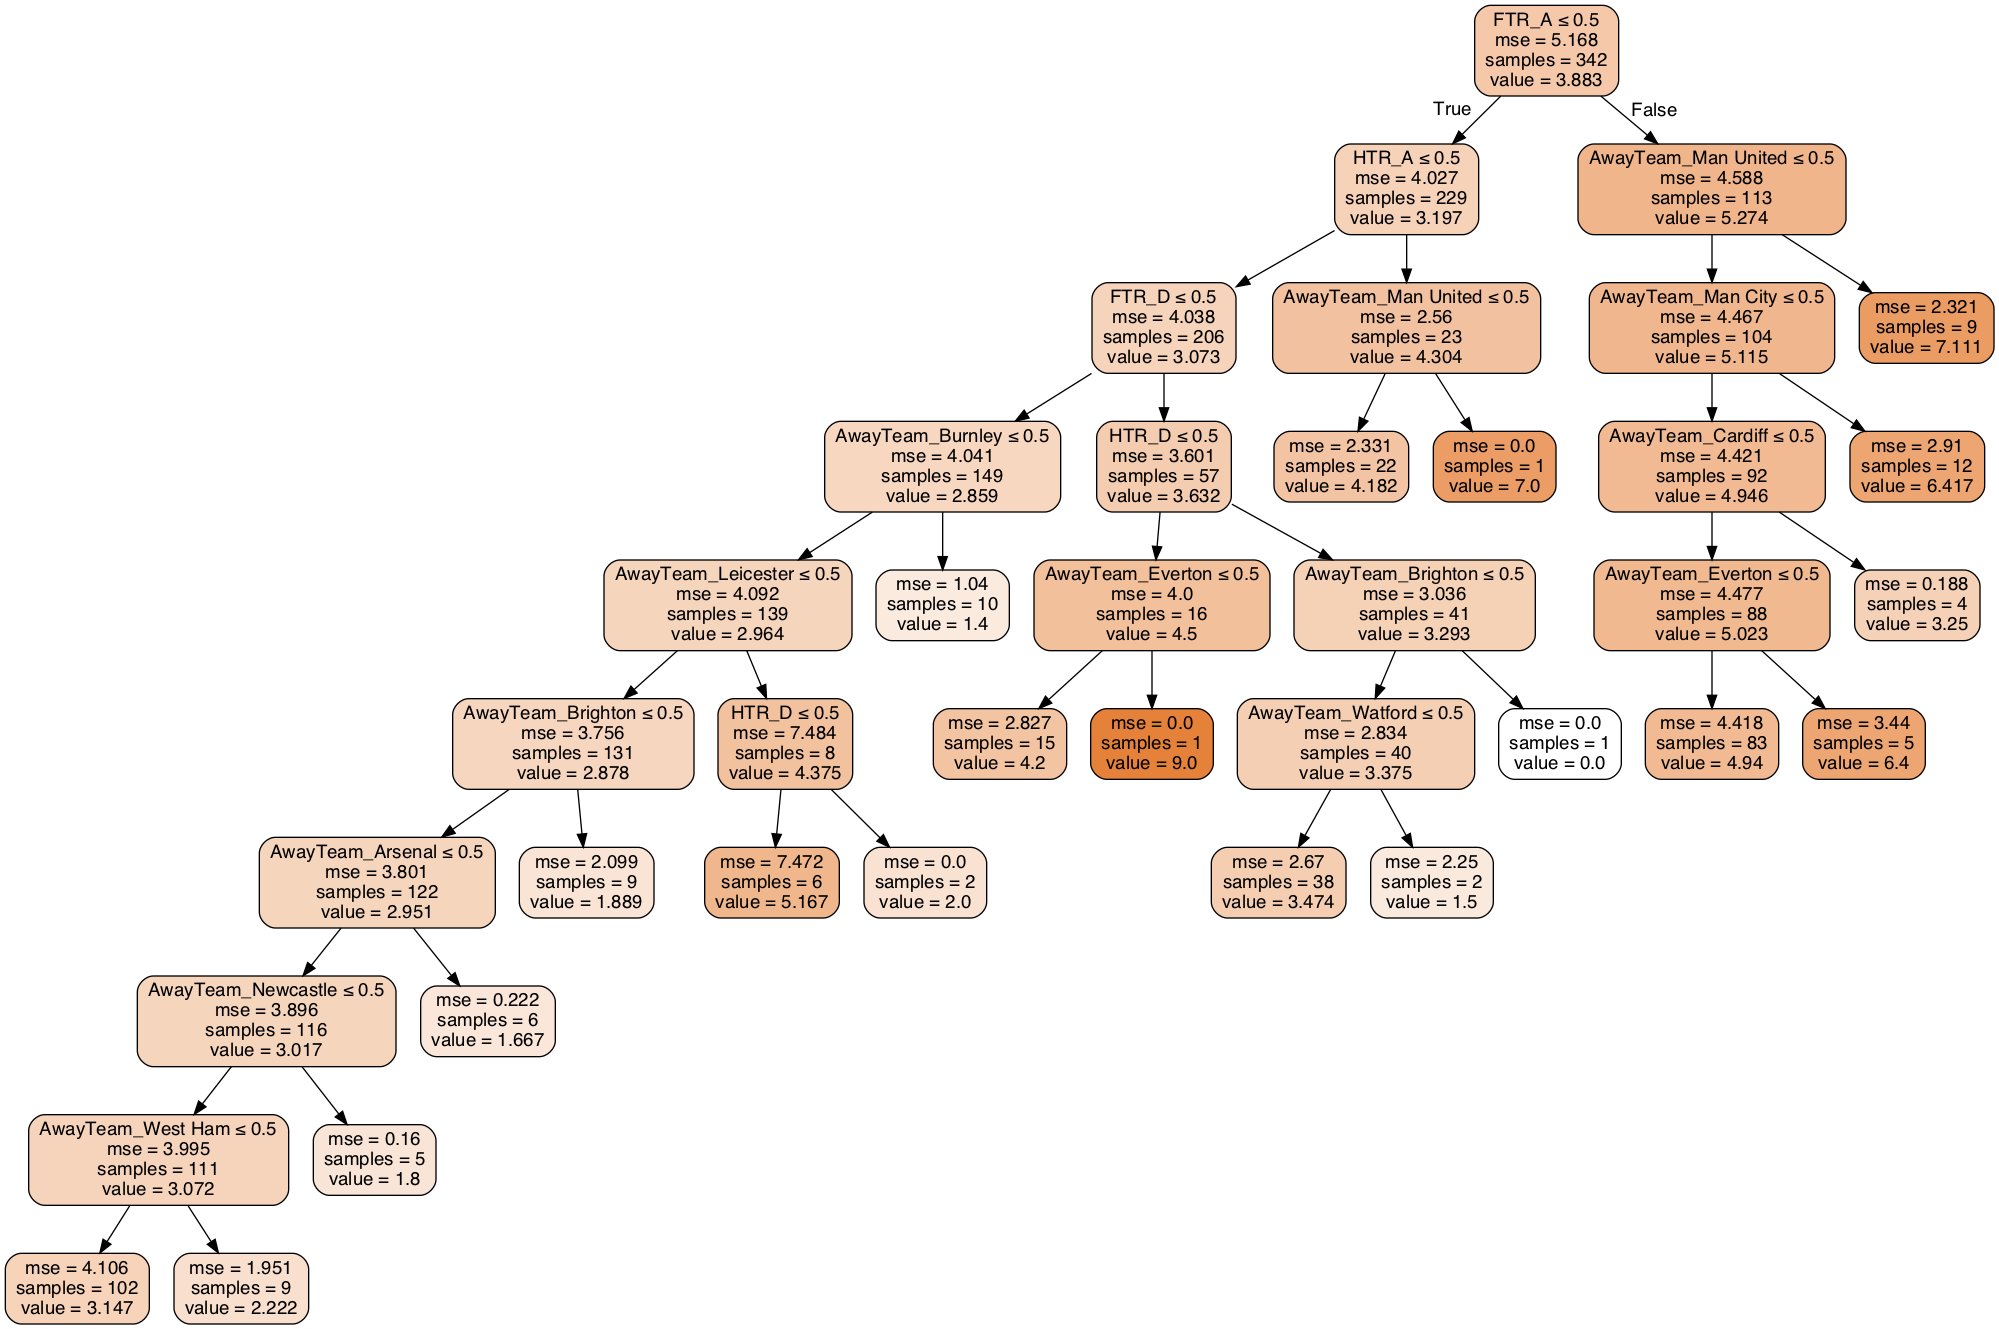

In [186]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('EPLtree.png')
Image(graph.create_png())